In [4]:
#911 calls final capstone project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [8]:
df['title'].nunique()

110

In [9]:
x=df['title'].iloc[0]
x

'EMS: BACK PAINS/INJURY'

In [10]:
x.split(':')[0]

'EMS'

#lambda title:title.split(':')[0]

In [11]:
df['Reason']=df['title'].apply(lambda title:title.split(':')[0])

In [12]:
df.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic


In [13]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

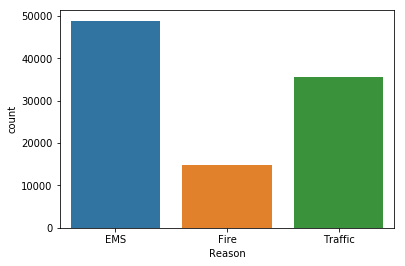

In [14]:
sns.countplot(x='Reason',data=df)

In [15]:
type(df['timeStamp'].iloc[0])

str

In [16]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [17]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
time=df['timeStamp'].iloc[0]
time


Timestamp('2015-12-10 17:40:00')

In [19]:
time.hour

17

In [20]:
time.year

2015

In [21]:
time.month

12

In [22]:
time.dayofweek

3

In [23]:
df['Hour']=df['timeStamp'].apply(lambda time:time.hour)

In [24]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17


In [25]:
df['Month']=df['timeStamp'].apply(lambda time:time.month)

In [26]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12


In [27]:
df['Dayofweek']=df['timeStamp'].apply(lambda time:time.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [28]:
d={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Dayofweek']=df['Dayofweek'].map(d)

In [29]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


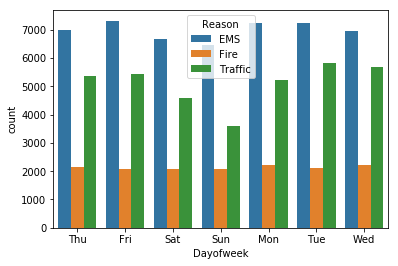

In [30]:
#exploratory data analysis(EDA)
sns.countplot(x='Dayofweek',data=df,hue='Reason')

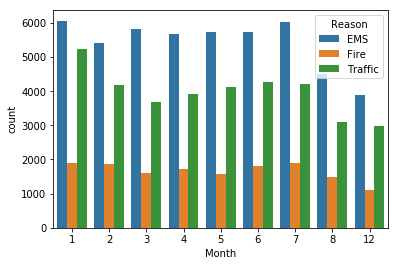

In [31]:
sns.countplot(x='Month',data=df,hue='Reason')

In [34]:
df['Month'].value_counts()

1     13205
7     12137
6     11786
2     11467
5     11423
4     11326
3     11101
8      9078
12     7969
Name: Month, dtype: int64

In [32]:
bymonth=df.groupby('Month').count()
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Dayofweek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


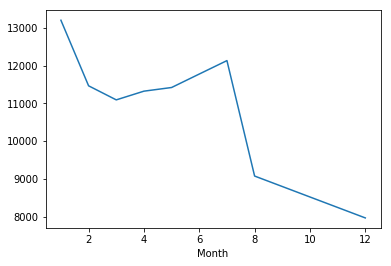

In [33]:
#counts of cal per month
bymonth['twp'].plot()

In [35]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


In [38]:
df['Date']=df['timeStamp'].apply(lambda time:time.date())

In [39]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [40]:
bydate=df.groupby('Date').count()
bydate

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
2015-12-15,421,421,421,380,421,421,420,419,421,421,421,421,421
2015-12-16,377,377,377,343,377,377,377,376,377,377,377,377,377
2015-12-17,388,388,388,336,388,388,388,387,388,388,388,388,388
2015-12-18,346,346,346,306,346,346,346,346,346,346,346,346,346


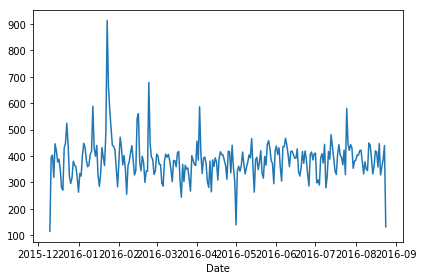

In [42]:
bydate['twp'].plot()
plt.tight_layout()

In [43]:
byreason=df[df['Reason']=='Traffic'].groupby('Date').count()
byreason

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek
Date,,,,,,,,,,,,,
2015-12-10,43,43,43,35,43,43,43,41,43,43,43,43,43
2015-12-11,141,141,141,108,141,141,141,137,141,141,141,141,141
2015-12-12,146,146,146,109,146,146,146,144,146,146,146,146,146
2015-12-13,78,78,78,54,78,78,78,76,78,78,78,78,78
2015-12-14,186,186,186,150,186,186,186,184,186,186,186,186,186
2015-12-15,183,183,183,160,183,183,183,181,183,183,183,183,183
2015-12-16,132,132,132,111,132,132,132,131,132,132,132,132,132
2015-12-17,167,167,167,140,167,167,167,166,167,167,167,167,167
2015-12-18,148,148,148,123,148,148,148,148,148,148,148,148,148


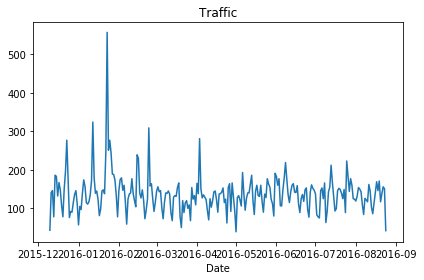

In [44]:
byreason['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

In [45]:
byreason=df[df['Reason']=='EMS'].groupby('Date').count()
byreason

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek
Date,,,,,,,,,,,,,
2015-12-10,57,57,57,52,57,57,57,57,57,57,57,57,57
2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186
2015-12-12,189,189,189,171,189,189,189,189,189,189,189,189,189
2015-12-13,190,190,190,178,190,190,190,190,190,190,190,190,190
2015-12-14,222,222,222,201,222,222,222,222,222,222,222,222,222
2015-12-15,195,195,195,180,195,195,194,195,195,195,195,195,195
2015-12-16,192,192,192,185,192,192,192,192,192,192,192,192,192
2015-12-17,166,166,166,151,166,166,166,166,166,166,166,166,166
2015-12-18,164,164,164,151,164,164,164,164,164,164,164,164,164


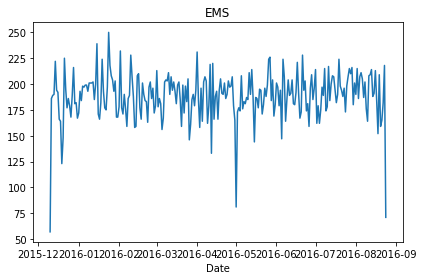

In [47]:
byreason['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [48]:
byreason=df[df['Reason']=='Fire'].groupby('Date').count()
byreason


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek
Date,,,,,,,,,,,,,
2015-12-10,15,15,15,13,15,15,15,15,15,15,15,15,15
2015-12-11,69,69,69,59,69,69,68,68,69,69,69,69,69
2015-12-12,68,68,68,53,68,68,68,68,68,68,68,68,68
2015-12-13,51,51,51,48,51,51,51,51,51,51,51,51,51
2015-12-14,39,39,39,36,39,39,38,39,39,39,39,39,39
2015-12-15,43,43,43,40,43,43,43,43,43,43,43,43,43
2015-12-16,53,53,53,47,53,53,53,53,53,53,53,53,53
2015-12-17,55,55,55,45,55,55,55,55,55,55,55,55,55
2015-12-18,34,34,34,32,34,34,34,34,34,34,34,34,34


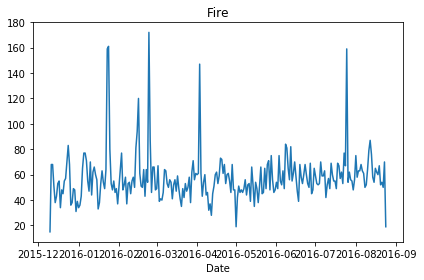

In [49]:
byreason['twp'].plot()
plt.title('Fire')
plt.tight_layout()

In [51]:
dayHour=df.groupby(by=['Dayofweek','Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


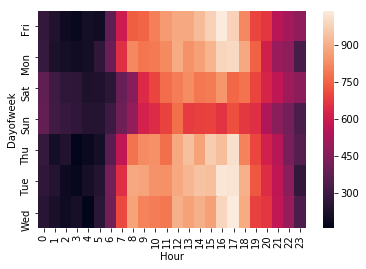

In [53]:
sns.heatmap(dayHour)

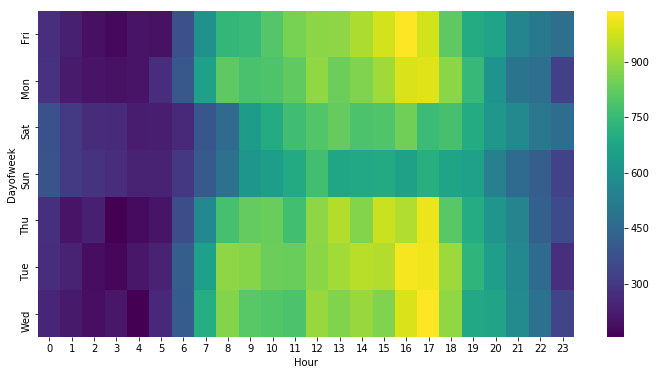

In [56]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

In [58]:
dayMonth=df.groupby(by=['Dayofweek','Month']).count()['Reason'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,12
Dayofweek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


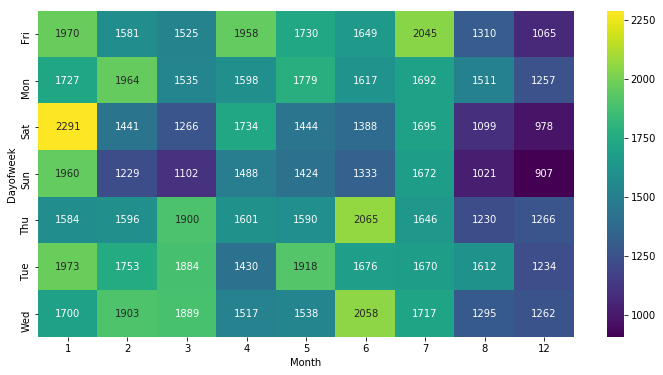

In [61]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis',annot=True,fmt='d')

In [ ]:
#pip insatll pandas_datareader
from pandas_datareader import data,wb
import datetime
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2016,1,1)

In [7]:
BAC=data.DataReader("BAC",'yahoo',start,end)
BAC

ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/BAC/history?period1=1136068200&period2=1451687399&interval=1d&frequency=1d&filter=history (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x00000243E6C31908>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [3]:
BAC=data.DataReader("BAC",'yahoo',start,end)
BAC

ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/BAC/history?period1=1136068200&period2=1451687399&interval=1d&frequency=1d&filter=history (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x00000243E6C316D8>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [6]:
#Bank of America
BAC=data.DataReader("BAC","yahoo",start,end)
BAC


ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/BAC/history?period1=1136068200&period2=1451687399&interval=1d&frequency=1d&filter=history (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x00000243E6C3FAC8>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [ ]:
#CITIGROUP
C=data.DataReader("C","yahoo",start,end)
C


In [8]:
JPM=data.DataReader("JPM","yahoo",start,end)
JPM


ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/JPM/history?period1=1136068200&period2=1451687399&interval=1d&frequency=1d&filter=history (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x00000243E7792978>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [9]:
df=data.DataReader(['BAC','C','GS','JPM','MS','WFC'],'yahoo',start,end)
df

C:\Users\Admin\Anaconda3\lib\site-packages\pandas_datareader\base.py:270: SymbolWarning: Failed to read symbol: 'BAC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas_datareader\base.py:270: SymbolWarning: Failed to read symbol: 'C', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas_datareader\base.py:270: SymbolWarning: Failed to read symbol: 'GS', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas_datareader\base.py:270: SymbolWarning: Failed to read symbol: 'JPM', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas_datareader\base.py:270: SymbolWarning: Failed to read symbol: 'MS', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas_datareader\base.py:

RemoteDataError: No data fetched using 'YahooDailyReader'

In [ ]:
tickers=['BAC','C','GS','JPM''MS','WFC']
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)
#set the column name levels
bank_stocks.columns.names=['Bank Ticker','Stock Info']
bank_stocks.head()

In [10]:
#exploratory Data ANALYSIS( EDA)
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

NameError: name 'bank_stocks' is not defined

In [ ]:
returns=pd.DataFrame()
for tick in tickers:
    returns[tick+ 'Return']=bank_stocks[tick]['Close'].pct_change()
returns.head()

In [ ]:
sns.pairplot(returns[1:])
#what stock stands out to you?why?
returns.idxmin()
#worst drop(4 of them on Inauguration day)
returns.idxmax()


In [ ]:
import pandas as pd
music_data=pd.read_csv('music.csv')
X=music_data.drop(columns=['genre'])
y=music_data['genre']
#create a model
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X,y)
#make predictions
predictions=model.predict([21,1],[22,0])
predictions
#array(['Hiphop','Dance'])
#accuracy of  the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
#predictions
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


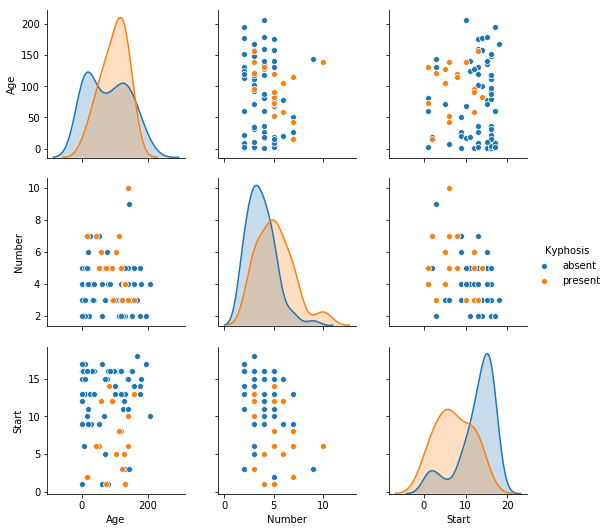

In [3]:
sns.pairplot(df,hue='Kyphosis')

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
X=df.drop("Kyphosis",axis=1)
y=df['Kyphosis']

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [12]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
predictions=model.predict(X_test)
#predictions

array(['absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'present'], dtype=object)

In [14]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.64

In [15]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
rfc_predictions=model.predict(X_test)
rfc_predictions

array(['absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [19]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,rfc_predictions)
score

0.84

In [1]:
#project
#Lendingclub.com 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans=pd.read_csv('loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Text(0.5, 0, 'FICO')

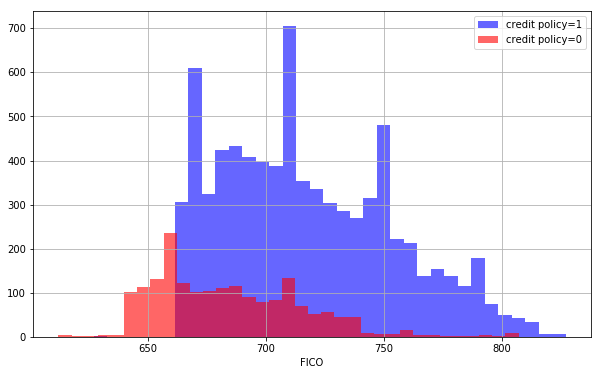

In [5]:
#EDA
#create a histogram of 2 fico distributions on top of each other ,one foe each credit policy outcome
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=35,color='blue',label='credit policy=1',alpha=0.6)
loans[loans['credit.policy']==0]['fico'].hist(bins=35,color='red',label='credit policy=0',alpha=0.6)
plt.legend()
plt.xlabel('FICO')



Text(0.5, 0, 'FICO')

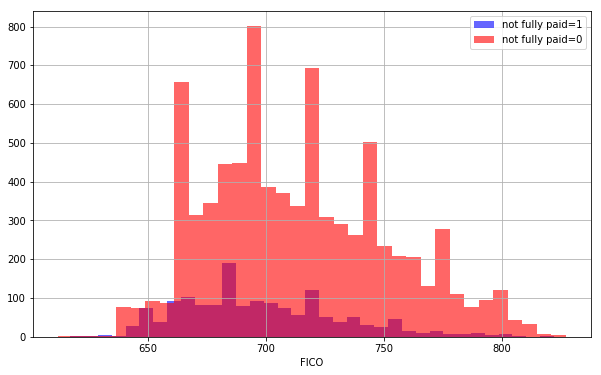

In [6]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35,color='blue',label='not fully paid=1',alpha=0.6)
loans[loans['not.fully.paid']==0]['fico'].hist(bins=35,color='red',label='not fully paid=0',alpha=0.6)
plt.legend()
plt.xlabel('FICO')



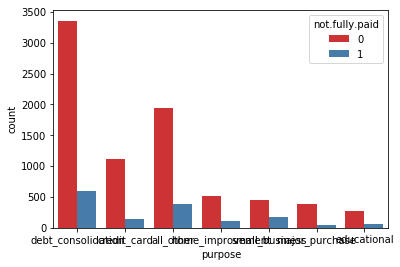

In [7]:
#counts of loan by purpose with color hue defined by not fully paid
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


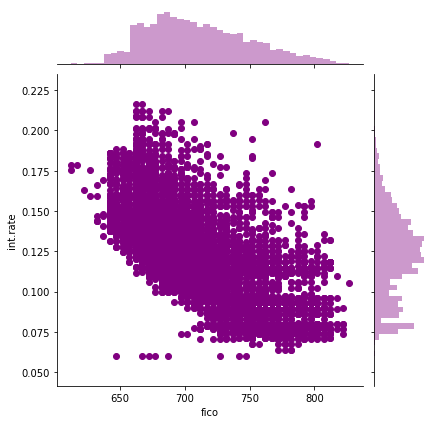

In [8]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
#pd.get_dummies
cat_feats=['purpose']#list of 1 element containing string purpose
final_data=pd.get_dummies(loans,columns=cat_feats,drop_first=True)
final_data.head(10)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
5,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,1,0,0,0,0,0
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,0,1,0,0,0,0
7,1,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,0,0,0,0,0,0
8,1,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0,0,0,0,1,0,0
9,1,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0,0,1,0,0,0,0


In [13]:
X=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [25]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
predictions=model.predict(X_test)
#predictions
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7331245650661099

In [27]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
rfc_predictions=model.predict(X_test)
#rfc_predictions
score=accuracy_score(y_test,rfc_predictions)
score

0.8336812804453723

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

In [ ]:
svm_pred=model.predict(X_test)

In [ ]:
score=accuracy_score(y_test,svm_predictions)
score